In [1]:
#Data from the US Census Bureau's Monthly Retail Trade statistics (https://www.census.gov/retail/index.html#mrts)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import binprism as bp
import calendar
from datetime import datetime, timedelta

# Read in data and plot estimated profile against observed data

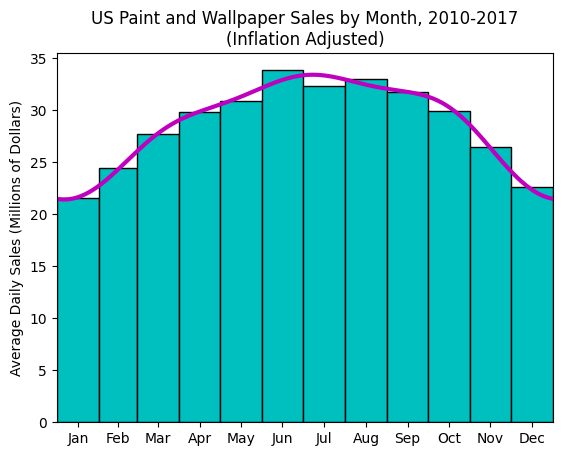

In [2]:
sales = np.array([670, 685, 861, 897, 958, 1016, 1003, 1025, 952, 929, 794, 702])
month_lengths = np.array([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
month_lengths2 = np.array(list(month_lengths[1:]) + [31])
month_starts = np.cumsum(month_lengths)
month_labels = calendar.month_abbr[1:13]
n_harmonics = 3
sales_profile = bp.fit(sales, month_starts, n_harmonics, (0, 365))
plt.bar(month_starts, sales/month_lengths2, month_lengths2, align = 'edge', facecolor = 'c', edgecolor = 'k')
sales_profile.plot(365, color = 'm', linewidth = 3)
plt.xlim(sales_profile.time_range)
plt.xticks(month_starts + 0.5*month_lengths2, month_labels)
plt.ylabel('Average Daily Sales (Millions of Dollars)')
plt.title('US Paint and Wallpaper Sales by Month, 2010-2017\n(Inflation Adjusted)')
plt.show()

# Using the fit profile, estimate the 2018 weekly paint and wallpaper sales between President's Day (Feb 19) and Memorial Day (May 28)

In [3]:
Feb19 = month_starts[1] + 18 #Month start numbers are zero-indexed
May28 = month_starts[4] + 27
weekly_sales = sales_profile[Feb19:May28:7]

week_starts = []
startdate = datetime(2018, 2, 19)
for i in range(14):
    week_starts.append(startdate.strftime('%b%d'))
    startdate += timedelta(days = 7)
weekly_sales_with_labels = pd.DataFrame({'Sales': pd.Series(weekly_sales, index = week_starts)})
weekly_sales_with_labels.index.name = 'Week'
weekly_sales_with_labels

,Sales
Week,
Feb19,176.841116
Feb26,182.929408
Mar05,188.699142
Mar12,193.921194
Mar19,198.458013
Mar26,202.275635
Apr02,205.438091
Apr09,208.085751
Apr16,210.402889
